In [ ]:
import os
import os.path
import pandas as pd 
import shutil
#file_path = os.chdir('/images/test/360')
file_path='/jupyter_project/images/480x480/'
for i in range(0,3):
    for j in range(0,10):
        os.mkdir(file_path+'Mobile_eval/'+str(i)+str(j)+str(0))
        os.mkdir(file_path+'Mobile_eval/'+str(i)+str(j)+str(1))
        os.mkdir(file_path+'Mobile_eval/'+str(i)+str(j)+str(2))
        os.mkdir(file_path+'Mobile_eval/'+str(i)+str(j)+str(3))

In [ ]:
file_list=os.listdir(file_path+'Mobile_eval')
len(file_list)
#img_name=file_path+'Mobile_eval'+'/'+''
q=0
for i in range(108,432,4):
    j=str(q).zfill(2)
    from_=(file_path+'Mobile_eval'+'/'+file_list[i]) 
    to_=(file_path+'Mobile_eval'+'/'+str(j)+str(0))
    shutil.move(from_,to_)
    
    from_=(file_path+'Mobile_eval'+'/'+file_list[i+1]) 
    to_=(file_path+'Mobile_eval'+'/'+str(j)+str(1))
    shutil.move(from_,to_)
    
    from_=(file_path+'Mobile_eval'+'/'+file_list[i+2]) 
    to_=(file_path+'Mobile_eval'+'/'+str(j)+str(2))
    shutil.move(from_,to_)
    
    from_=(file_path+'Mobile_eval'+'/'+file_list[i+3]) 
    to_=(file_path+'Mobile_eval'+'/'+str(j)+str(3))
    shutil.move(from_,to_)
    q=q+1
    if(q==27):
        q=0

In [ ]:
file_list=os.listdir(file_path+'Mobile_eval')
q=10
j=str(q).zfill(2)
#file_list[i]
file_list[i+1]
file_list[i+2]
file_list[i+3]
file_path+'Mobile_eval'+'/'+str(j)+str(2)
q=q+1
j=str(q).zfill(2)
j

In [ ]:
file_list=os.listdir(file_path+'Mobile_eval')

len(file_list)


In [ ]:
pip install torch==1.10.0+cu102 torchvision==0.11.1+cu102 torchaudio===0.10.0+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html

In [ ]:
##필요 라이브러리
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset,DataLoader
import numpy as np
import torchvision
from torchvision import transforms

#이미지 전처리
trans = transforms.Compose([transforms.Resize((100,100)),
                           transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])
trainset=torchvision.datasets.ImageFolder(root="C:/jupyter_project/images/480x480/360_train/",
                                         transform=trans)
# 18번째 데이터 가져오기
#trainset.__getitem__(18)

#데이터수 확인 540장
#len(trainset)

#class 확인
classes = trainset.classes
#classes

#Dataloader를 통해 데이터 올리기

trainloader = DataLoader(trainset,
                        batch_size=16,
                        shuffle=False,
                        num_workers=2)
#batch_size= 16개 shuffle 안함, cpucore 4
dataiter=iter(trainloader)
images,labels=dataiter.next()
#print(labels)

#이미지 데이터 시각화
def imshow(img):
    img = img /2 + 0.5 #unnormalize
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img,(1,2,0)))
    print(np_img.shape)
    print((np.transposes(np_img,(1,2,0))).shape)

    
print(images.shape)
imshow(torchvision.utils.make_grid(images,nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5c " %classes[labels[j]] for j in range(16)))

In [ ]:
##필요 라이브러리
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset,DataLoader
import numpy as np
import torchvision
from torchvision import transforms



In [ ]:
#이미지 전처리
trans = transforms.Compose([transforms.Resize((100,100)),
                           transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])
trainset=torchvision.datasets.ImageFolder(root="C:/Users/sksks/Desktop/jupyter_project/images/480x480/360_train/",
                                         transform=trans)
# 18번째 데이터 가져오기

In [ ]:
classes = trainset.classes
classes

In [ ]:
#Dataloader를 통해 데이터 올리기

trainloader = DataLoader(trainset,
                        batch_size=16,
                        shuffle=False,
                        num_workers=2)
#batch_size= 16개 shuffle 안함, cpucore 4
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(labels)

In [ ]:
def imshow(img):
    img = img /2 + 0.5 #unnormalize
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img,(1,2,0)))
    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)

In [ ]:
print(images.shape)
imshow(torchvision.utils.make_grid(images,nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s " %classes[labels[j]] for j in range(16)))

In [1]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models

import torch
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
from torch.optim import lr_scheduler
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import time
%matplotlib inline
def imshow(inp) :
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485,0.456,0.406])
    std = np.array([0.229, 0.224,0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0,1)
    plt.imshow(inp)
path = 'C:/Users/sksks/Desktop/jupyter_project/images/480x480/360_train/'
# 폴더 안에 모든 파일 목록을 읽음

files = glob(os.path.join(path,'*/*.jpg'))

print(f'Total no of images {len(files)}')

no_of_images = 25000
no_of_images = len(files)



Total no of images 540


In [2]:
no_of_images*0.8


432.0

In [3]:
if torch.cuda.is_available():
    is_cuda = True

In [4]:
torch.cuda.is_available()


True

In [5]:
simple_transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train = ImageFolder('C:/Users/sksks/Desktop/jupyter_project/images/480x480/360_train/',simple_transform)
valid = ImageFolder('C:/Users/sksks/Desktop/jupyter_project/images/480x480/Mobile_eval/',simple_transform)

In [6]:
print(train.class_to_idx)
print(train.classes) 

{'000': 0, '001': 1, '002': 2, '003': 3, '010': 4, '011': 5, '012': 6, '013': 7, '020': 8, '021': 9, '022': 10, '023': 11, '030': 12, '031': 13, '032': 14, '033': 15, '040': 16, '041': 17, '042': 18, '043': 19, '050': 20, '051': 21, '052': 22, '053': 23, '060': 24, '061': 25, '062': 26, '063': 27, '070': 28, '071': 29, '072': 30, '073': 31, '080': 32, '081': 33, '082': 34, '083': 35, '090': 36, '091': 37, '092': 38, '093': 39, '100': 40, '101': 41, '102': 42, '103': 43, '110': 44, '111': 45, '112': 46, '113': 47, '120': 48, '121': 49, '122': 50, '123': 51, '130': 52, '131': 53, '132': 54, '133': 55, '140': 56, '141': 57, '142': 58, '143': 59, '150': 60, '151': 61, '152': 62, '153': 63, '160': 64, '161': 65, '162': 66, '163': 67, '170': 68, '171': 69, '172': 70, '173': 71, '180': 72, '181': 73, '182': 74, '183': 75, '190': 76, '191': 77, '192': 78, '193': 79, '200': 80, '201': 81, '202': 82, '203': 83, '210': 84, '211': 85, '212': 86, '213': 87, '220': 88, '221': 89, '222': 90, '223': 9

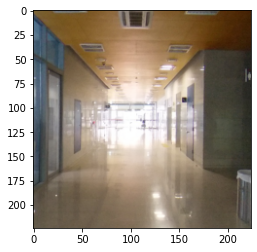

In [7]:
imshow(train[50][0])

In [8]:
train_data_gen = torch.utils.data.DataLoader(train,shuffle=True,batch_size=64,num_workers=3)
valid_data_gen = torch.utils.data.DataLoader(valid,batch_size=64,num_workers=3)

In [9]:
dataset_sizes = {'train':len(train_data_gen.dataset),'valid':len(valid_data_gen.dataset)}

In [10]:
dataloaders = {'train':train_data_gen,'valid':valid_data_gen}

In [11]:
model_ft = models.resnet18(pretrained=True) # Resnet 알고리즘의 인스턴스를 생성
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 108)

if is_cuda :
    model_ft = model_ft.cuda()

In [12]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
model_ft.fc = nn.Linear(num_ftrs, 108)
if is_cuda :
    model_ft = model_ft.cuda()

In [14]:
# 오차 함수와 옵티마이저

learning_rate = 0.001
criterion = nn.CrossEntropyLoss() # 오차함수 생성
# Stochastic Gradient Descent 기반 옵티마이저 생성
optimizer_ft = optim.SGD(model_ft.parameters(),lr=learning_rate,momentum=0.9)
# 학습률을 동적으로 변경하는 기능인 StepLR
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [15]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()
    
    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        # 각 Epoch은 학습 단계와 검증 단계를 거침
        for phase in ['train','valid']:
            if phase == 'train':
                scheduler.step()
                model.train(True)
            else:
                model.train(False)
                
            running_loss = 0.0
            running_corrects = 0
            
            # 데이터 반복
            for data in dataloaders[phase]:
                # 입력 데이터 가져오기, 데이터 획득
                inputs, labels = data
                
                # 데이터를 Variable로 만듦, 데이터 래핑(Variable)
                if torch.cuda.is_available():
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)
                
                # 파라미터 기울기 초기화
                optimizer.zero_grad()
                
                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)
                
                # 학습 단계에서만 수행, 역전파 + 옵티마이즈(최적화)
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                    
                # 통계
                running_loss += loss.data
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss.item() / dataset_sizes[phase]
            epoch_acc = running_corrects.item() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            
            # 모델 복사(Deep Copy)
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
        print()
        
    time_elapsed = time.time() - since
    print("Training complete in {:.0f}m {:.0f}".format(time_elapsed // 60, time_elapsed % 60))
    print("Best Validation Accuracy : {:4f}".format(best_acc))
    
    # 최적의 모델 weights 로딩
    
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
%%time
model_ft = train_model(model_ft,criterion,exp_lr_scheduler,optimizer_ft,num_epochs=24)

Epoch 0/23
----------


E:\anaconda3\envs\jins\lib\site-packages\torch\optim\lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train Loss: 0.0811 Acc: 0.0037
valid Loss: 0.0795 Acc: 0.0185

Epoch 1/23
----------
train Loss: 0.0742 Acc: 0.0407
valid Loss: 0.0740 Acc: 0.0426

Epoch 2/23
----------
train Loss: 0.0660 Acc: 0.2722
valid Loss: 0.0685 Acc: 0.1759

Epoch 3/23
----------
train Loss: 0.0580 Acc: 0.5907
valid Loss: 0.0636 Acc: 0.3333

Epoch 4/23
----------
train Loss: 0.0508 Acc: 0.8315
valid Loss: 0.0590 Acc: 0.4648

Epoch 5/23
----------
train Loss: 0.0441 Acc: 0.9315
valid Loss: 0.0548 Acc: 0.6037

Epoch 6/23
----------
train Loss: 0.0402 Acc: 0.9685
valid Loss: 0.0545 Acc: 0.6148

Epoch 7/23
----------
train Loss: 0.0396 Acc: 0.9815
valid Loss: 0.0543 Acc: 0.6315

Epoch 8/23
----------
train Loss: 0.0387 Acc: 0.9741
valid Loss: 0.0540 Acc: 0.6352

Epoch 9/23
----------
train Loss: 0.0385 Acc: 0.9778
valid Loss: 0.0536 Acc: 0.6463

Epoch 10/23
----------
train Loss: 0.0380 Acc: 0.9778
valid Loss: 0.0533 Acc: 0.6648

Epoch 11/23
----------
train Loss: 0.0371 Acc: 0.9833
valid Loss: 0.0529 Acc: 0.6722

